In [ ]:
# We started by exploring the data corelation and behavior to inform the decision of differnt models. There is anothe notebook with the N attempts, thisis just what we used for the rpresentaiotn and summary
# Consolidation of 5 Model Predictions for Max Temperature in 2024 for Cordoba/Santa Fe, Argentina
# Model 1: 
# Type: Regression Model
# Informed by: National Meteorological Service of Argentina (SMNA - Servicio Meteorológico Nacional de Argentina) anomalies. See model image in our slide deck
# Time Frame: Starting from 2017
# Data Source: SMNA local weather stations in Argentina
# Result: 
# - Slope (temperature increase per year since 2017): 0.14285714285714232
# - Predicted Max Temperature for 2024: 42.96°C

# Model 2:
# Type: Regression Model
# Informed by: LOESS inflection for magnetic field intensity (variable F, measured in n/T). See code for this model in the notebbok "Mag_data_Vires_SWARM - Climate Change NNL Womanium Quantum AI Project.ipynb
# Time Frame: Starting from 2/2/2022
# Data Source: SWARM Satellite Constellation
# Result:
# - Slope (temperature increase per year since 2/2/2022): -1.40°C
# - Predicted Max Temperature for 2024: 41.10°C

# Model 3:
# Type: Regression Model
# Informed by: GHI (Global Horizontal Irradiance) inflection
# Time Frame: Starting from 2020
# Data Source: Copernicus Satellite Constellation
# Measurement: GHI measured in W/m²
# Result:
# - Slope (temperature increase per year since 2020): 0.19°C
# - Predicted Max Temperature for 2024: 43.20°C

# Model 4:
# Type: Regression Model
# Informed by: Entire dataset
# Time Frame: 1/1/2015 - 7/1/2024
# Data Source: SMNA local weather stations in Argentina
# Result:
# - Slope (temperature increase per year for entire dataset): 0.22166666666666618
# - Predicted Max Temperature for 2024: 43.23°C

# Model 5:
# Type: SARIMA Model (Seasonal AutoRegressive Integrated Moving Average)
# Informed by: Time Series Data
# Time Frame: 1/1/2015 - 7/1/2024
# Result:
# - Predicted Max Temperature for 2024: 42.50°C
# - 95% Confidence Interval for 2024: [46°C]
 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the CSV file into a DataFrame
file_path = r'C:\Users\synap\OneDrive\Desktop\Programs\Climate Change NNL\Final sets\final_combined_data_GHI_Temp_F_K.csv'  # Your file path
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Define columns that should be numeric
numeric_columns = ['GHI', 'F', 'Temp_Max', 'Kp', 'Clear sky GHI', 'Clear sky DHI', 
                   'Clear sky BNI', 'Clear sky BHI', 'TOA', 'BHI', 'DHI', 'BNI', 
                   'Reliability', 'Temp. Min', 'Precipitation (mm)', 'ALT (m)']

# Clean numeric columns
for col in numeric_columns:
    if df[col].dtype == 'object':  # Check if the column type is object (string)
        df[col] = df[col].str.replace(',', '').astype(float)

# Display the first few rows of the DataFrame to inspect the data
print("First few rows of the dataset:")
print(df.head())

# Display the columns in the DataFrame
print("\nColumns in the dataset:")
print(df.columns)

# Basic statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Exclude non-numeric columns before computing the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Check the correlation between the numeric columns
print("\nCorrelation matrix:")
print(numeric_df.corr())

# Visualize the correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Assuming you have selected 'X_column' as the independent variable(s) and 'Y_column' as the dependent variable
X = df[['X_column']]  # Replace 'X_column' with your feature(s)
Y = df['Y_column']    # Replace 'Y_column' with your target variable

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the regression line
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2)
plt.xlabel('X_column')  # Replace with your feature(s) name
plt.ylabel('Y_column')  # Replace with your target variable name
plt.title('Regression Line')
plt.show()



Slope (temperature increase per year since 2017): 0.14285714285714232
Predicted Max Temp_Max for 2024 (from 2017 onwards): 42.95714285714291
Slope (temperature increase per year since 2/2/2022): -1.3999999999999981
Predicted Max Temp_Max for 2024 (from 2/2/2022 onwards): 41.09999999999991
Slope (temperature increase per year since 2020): 0.1899999999999998
Predicted Max Temp_Max for 2024 (from 2020 onwards): 43.19999999999999
Slope (temperature increase per year for entire dataset): 0.22166666666666618
Predicted Max Temp_Max for 2024 (entire dataset): 43.230555555555554


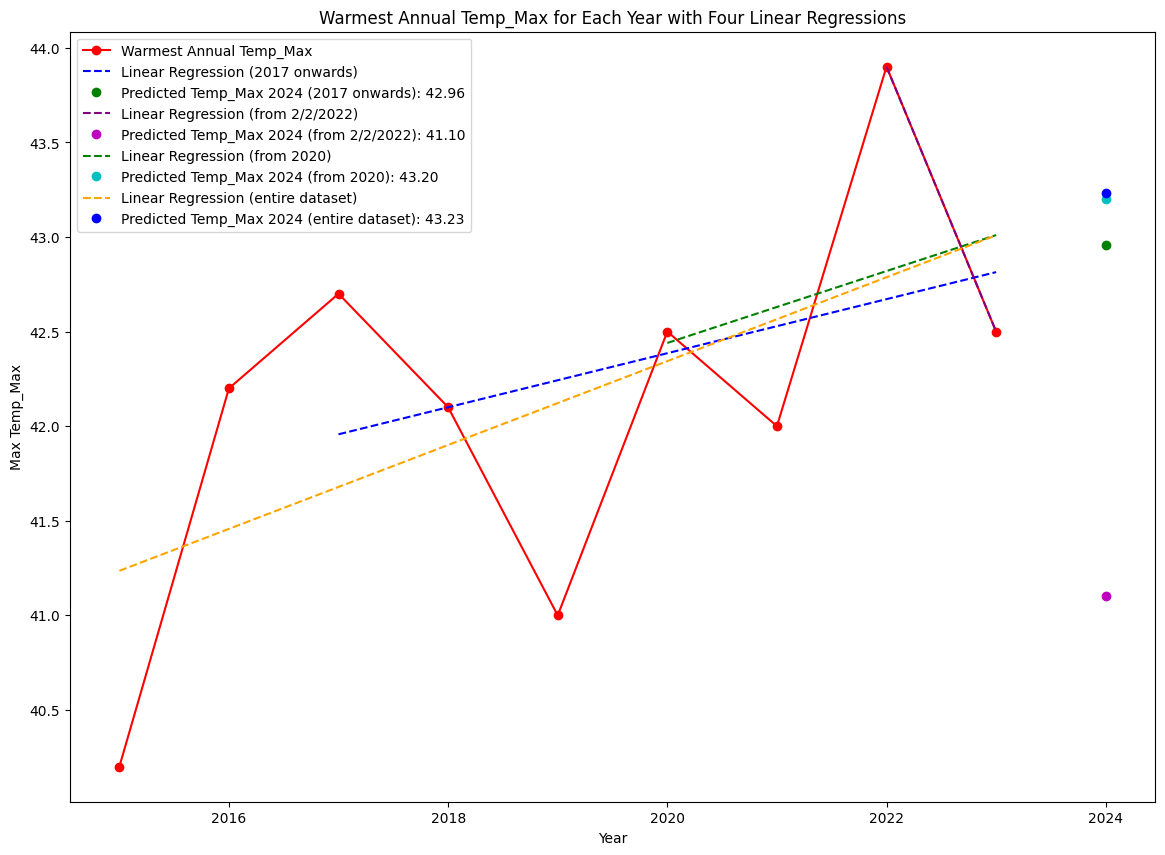

In [10]:
#THis is a consolidatoin of 4 out of the 5 predictions of Max Temperature for 2024 in the zone of Cordoba/Santa Fe Argentina
#The script prints the predicted warmest temperatures for 2024 based on all four regression models:
#Model 1: Starting from 2017, informed by SNMA anomalies.
#Model 2: Starting from 2/2/2022, informed by the LOESS inflection for magnetic field intensity.
#Model 3: Starting from 2020, informed by the GHI inflection.
#Model 4: Based on the entire dataset.

                                                    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file into a DataFrame
file_path = r'C:\Users\synap\OneDrive\Desktop\Programs\Climate Change NNL\Final sets\final_combined_data_GHI_Temp_F_K.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Clean numeric columns
numeric_columns = ['GHI', 'F', 'Temp_Max', 'Kp', 'Clear sky GHI', 'Clear sky DHI', 
                   'Clear sky BNI', 'Clear sky BHI', 'TOA', 'BHI', 'DHI', 'BNI', 
                   'Reliability', 'Temp. Min', 'Precipitation (mm)', 'ALT (m)']

for col in numeric_columns:
    if df[col].dtype == 'object':  # Check if the column type is object (string)
        df[col] = df[col].str.replace(',', '').astype(float)

# Drop rows with missing Temp_Max values
df.dropna(subset=['Temp_Max'], inplace=True)

# Filter out the year 2024
df = df[df.index.year != 2024]

# Group by year and calculate the maximum Temp_Max for each year
df['Year'] = df.index.year
yearly_temp_max = df.groupby('Year')['Temp_Max'].max()

# **First linear regression from 2017 onward, informed by SNMA-reported anomalous temperatures**
yearly_temp_max_post_2017 = yearly_temp_max[yearly_temp_max.index >= 2017]
X1 = yearly_temp_max_post_2017.index.values.reshape(-1, 1)
y1 = yearly_temp_max_post_2017.values
model1 = LinearRegression()
model1.fit(X1, y1)
slope1 = model1.coef_[0]
predicted_temp_2024_1 = model1.predict([[2024]])

# **Second linear regression starting from 2/2/2022, informed by the inflection point of the LOESS Smoothing**
start_date_2022 = '2022-02-02'
df_post_inflection = df[df.index >= start_date_2022]
yearly_temp_max_post_2022 = df_post_inflection.groupby('Year')['Temp_Max'].max()
X2 = yearly_temp_max_post_2022.index.values.reshape(-1, 1)
y2 = yearly_temp_max_post_2022.values
model2 = LinearRegression()
model2.fit(X2, y2)
slope2 = model2.coef_[0]
predicted_temp_2024_2 = model2.predict([[2024]])

# **Third linear regression starting from 2020, informed by GHI inflection point**
yearly_temp_max_post_2020 = yearly_temp_max[yearly_temp_max.index >= 2020]
X3 = yearly_temp_max_post_2020.index.values.reshape(-1, 1)
y3 = yearly_temp_max_post_2020.values
model3 = LinearRegression()
model3.fit(X3, y3)
slope3 = model3.coef_[0]
predicted_temp_2024_3 = model3.predict([[2024]])

# **Fourth linear regression based on the entire dataset**
X4 = yearly_temp_max.index.values.reshape(-1, 1)  # Year as X
y4 = yearly_temp_max.values  # Max Temp_Max as y
model4 = LinearRegression()
model4.fit(X4, y4)
slope4 = model4.coef_[0]
predicted_temp_2024_4 = model4.predict([[2024]])

# Print the slope and predicted warmest temperature for 2024 for each regression model
print(f"Slope (temperature increase per year since 2017): {slope1}")
print(f"Predicted Max Temp_Max for 2024 (from 2017 onwards): {predicted_temp_2024_1[0]}")

print(f"Slope (temperature increase per year since 2/2/2022): {slope2}")
print(f"Predicted Max Temp_Max for 2024 (from 2/2/2022 onwards): {predicted_temp_2024_2[0]}")

print(f"Slope (temperature increase per year since 2020): {slope3}")
print(f"Predicted Max Temp_Max for 2024 (from 2020 onwards): {predicted_temp_2024_3[0]}")

print(f"Slope (temperature increase per year for entire dataset): {slope4}")
print(f"Predicted Max Temp_Max for 2024 (entire dataset): {predicted_temp_2024_4[0]}")

# Plot the Temp_Max for each year and the four linear regression lines
plt.figure(figsize=(14, 10))

# Plot the original data
plt.plot(yearly_temp_max.index, yearly_temp_max.values, marker='o', linestyle='-', color='red', label='Warmest Annual Temp_Max')

# Plot the first regression line (2017 onwards)
plt.plot(X1, model1.predict(X1), linestyle='--', color='blue', label='Linear Regression (2017 onwards)')
plt.plot(2024, predicted_temp_2024_1, 'go', label=f'Predicted Temp_Max 2024 (2017 onwards): {predicted_temp_2024_1[0]:.2f}')

# Plot the second regression line (from 2/2/2022)
plt.plot(X2, model2.predict(X2), linestyle='--', color='purple', label='Linear Regression (from 2/2/2022)')
plt.plot(2024, predicted_temp_2024_2, 'mo', label=f'Predicted Temp_Max 2024 (from 2/2/2022): {predicted_temp_2024_2[0]:.2f}')

# Plot the third regression line (from 2020, GHI inflection point)
plt.plot(X3, model3.predict(X3), linestyle='--', color='green', label='Linear Regression (from 2020)')
plt.plot(2024, predicted_temp_2024_3, 'co', label=f'Predicted Temp_Max 2024 (from 2020): {predicted_temp_2024_3[0]:.2f}')

# Plot the fourth regression line (entire dataset)
plt.plot(X4, model4.predict(X4), linestyle='--', color='orange', label='Linear Regression (entire dataset)')
plt.plot(2024, predicted_temp_2024_4, 'bo', label=f'Predicted Temp_Max 2024 (entire dataset): {predicted_temp_2024_4[0]:.2f}')

plt.xlabel('Year')
plt.ylabel('Max Temp_Max')
plt.title('Warmest Annual Temp_Max for Each Year with Four Linear Regressions')
plt.legend()
plt.show()


C:\Users\synap\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\synap\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\synap\AppData\Local\Temp\ipykernel_31664\1708344962.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"95% Confidence Interval for 2024: [{confidence_interval_2024[0]:.2f}°C, {confidence_interval_2024[1]:

Predicted Highest Temp_Max for 2024: 42.50°C
95% Confidence Interval for 2024: [-1917.46°C, 2002.46°C]


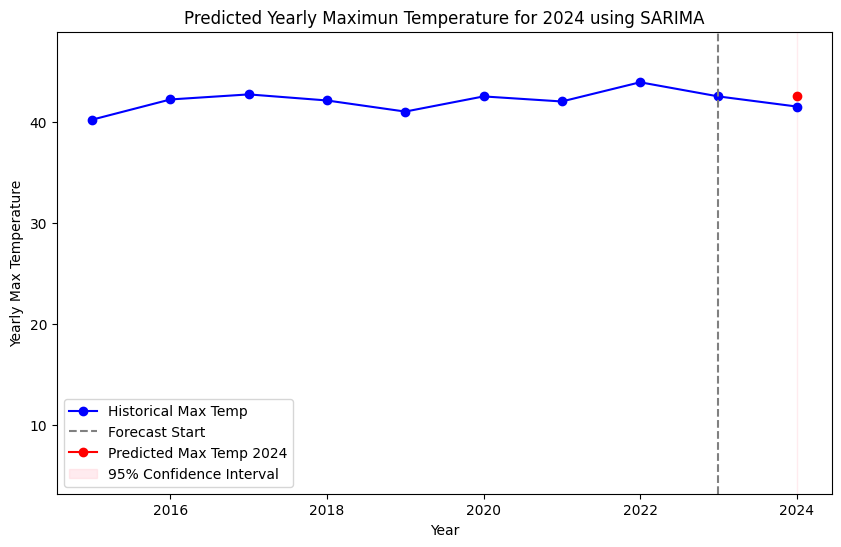

In [6]:
#This is the SARIMA model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the CSV file into a DataFrame
file_path = r'C:\Users\synap\OneDrive\Desktop\Programs\Climate Change NNL\Final sets\final_combined_data_GHI_Temp_F_K.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)

# Clean numeric columns
numeric_columns = ['GHI', 'F', 'Temp_Max', 'Kp', 'Clear sky GHI', 'Clear sky DHI', 
                   'Clear sky BNI', 'Clear sky BHI', 'TOA', 'BHI', 'DHI', 'BNI', 
                   'Reliability', 'Temp. Min', 'Precipitation (mm)', 'ALT (m)']

for col in numeric_columns:
    if df[col].dtype == 'object':  # Check if the column type is object (string)
        df[col] = df[col].str.replace(',', '').astype(float)

# Drop rows with missing Temp_Max values
df.dropna(subset=['Temp_Max'], inplace=True)

# Group by year and find the maximum Temp_Max for each year
df['Year'] = df.index.year
max_temp_per_year = df.groupby('Year')['Temp_Max'].max()

# Reset index for proper handling of SARIMA
max_temp_per_year = max_temp_per_year.reset_index()

# Split the data into train and test sets (using data up to 2023 for training)
train_data = max_temp_per_year[max_temp_per_year['Year'] < 2024]

# Fit a SARIMA model to the training data with adjusted seasonal periodicity and indexing
sarima_model = SARIMAX(train_data['Temp_Max'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Forecast the highest Temp_Max for 2024
forecast = sarima_fit.get_forecast(steps=1)
forecast_ci = forecast.conf_int()

predicted_max_temp_2024 = forecast.predicted_mean.iloc[0]
confidence_interval_2024 = forecast_ci.iloc[0]

print(f"Predicted Highest Temp_Max for 2024: {predicted_max_temp_2024:.2f}°C")
print(f"95% Confidence Interval for 2024: [{confidence_interval_2024[0]:.2f}°C, {confidence_interval_2024[1]:.2f}°C]")

# Plot the historical data and forecast with adjusted y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(max_temp_per_year['Year'], max_temp_per_year['Temp_Max'], marker='o', linestyle='-', color='blue', label='Historical Max Temp')
plt.axvline(x=2023, color='gray', linestyle='--', label='Forecast Start')
plt.plot([2024], [predicted_max_temp_2024], marker='o', color='red', label='Predicted Max Temp 2024')
plt.fill_between([2024], confidence_interval_2024[0], confidence_interval_2024[1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.ylim([df['Temp_Max'].min() - 5, df['Temp_Max'].max() + 5])
plt.xlabel('Year')
plt.ylabel('Yearly Max Temperature')
plt.title('Predicted Yearly Maximun Temperature for 2024 using SARIMA')
plt.legend()
plt.show()
